In [1]:
!wget https://media.githubusercontent.com/media/mrcolorblind/chess_covid/master/data/chessdotcom/players.csv -O chessdotcom_players.csv

--2021-02-28 22:33:56--  https://media.githubusercontent.com/media/mrcolorblind/chess_covid/master/data/chessdotcom/players.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-02-28 22:33:57 ERROR 404: Not Found.



In [ ]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import rc
import pandas as pd
from datetime import datetime
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

rc('font', **font)

In [ ]:
players = pd.read_csv('chessdotcom_players.csv')

In [ ]:
players.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
0,5999382,-whitetiger-,IN,4,1611593481,1319353379,False,basic,None,1733,1487,1345
1,113902696,00000000000a5,IN,2,1611550728,1611071564,False,basic,None,1298,0,0
2,106710230,00000000a,IN,5,1611585871,1608800475,False,basic,None,1016,0,0
3,103508064,00000000oooooooo,IN,0,1611590946,1607689710,False,basic,None,988,0,0
4,48828546,000000pankaj,IN,5,1611574958,1534435936,False,basic,None,1171,1454,1041


In [ ]:
paises = players["country"]

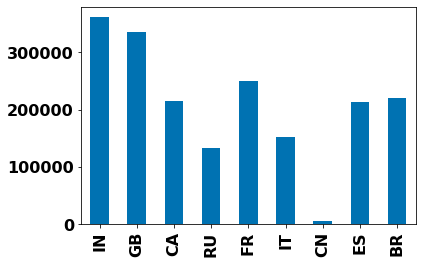

In [ ]:
paises_count = Counter(paises)
df = pd.DataFrame.from_dict(paises_count, orient='index')
df.plot(kind='bar', legend=False)
# tem algo de errado com a china, talvez seja melhor tirar ela...

In [ ]:
jog = players.copy()
correto = np.array(jog["joined"])
l = []
for i in range(0,len(correto)):
  l.append(datetime.utcfromtimestamp(correto[i]).strftime('%Y-%m-%d'))
  
jog["joined"] = l
jog.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
0,5999382,-whitetiger-,IN,4,1611593481,2011-10-23,False,basic,None,1733,1487,1345
1,113902696,00000000000a5,IN,2,1611550728,2021-01-19,False,basic,None,1298,0,0
2,106710230,00000000a,IN,5,1611585871,2020-12-24,False,basic,None,1016,0,0
3,103508064,00000000oooooooo,IN,0,1611590946,2020-12-11,False,basic,None,988,0,0
4,48828546,000000pankaj,IN,5,1611574958,2018-08-16,False,basic,None,1171,1454,1041


In [ ]:
datas = jog.groupby("joined").count()datas.head()

,player_id,username,country,followers,last_online,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
joined,,,,,,,,,,,
2006-12-23,1,1,1,1,1,1,1,1,1,1,1
2007-01-23,1,1,1,1,1,1,1,1,1,1,1
2007-02-08,1,1,1,1,1,1,1,1,1,1,1
2007-02-27,1,1,1,1,1,1,1,1,1,1,1
2007-03-21,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
datas.head()

,player_id,username,country,followers,last_online,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
joined,,,,,,,,,,,
2006-12-23,1,1,1,1,1,1,1,1,1,1,1
2007-01-23,1,1,1,1,1,1,1,1,1,1,1
2007-02-08,1,1,1,1,1,1,1,1,1,1,1
2007-02-27,1,1,1,1,1,1,1,1,1,1,1
2007-03-21,1,1,1,1,1,1,1,1,1,1,1


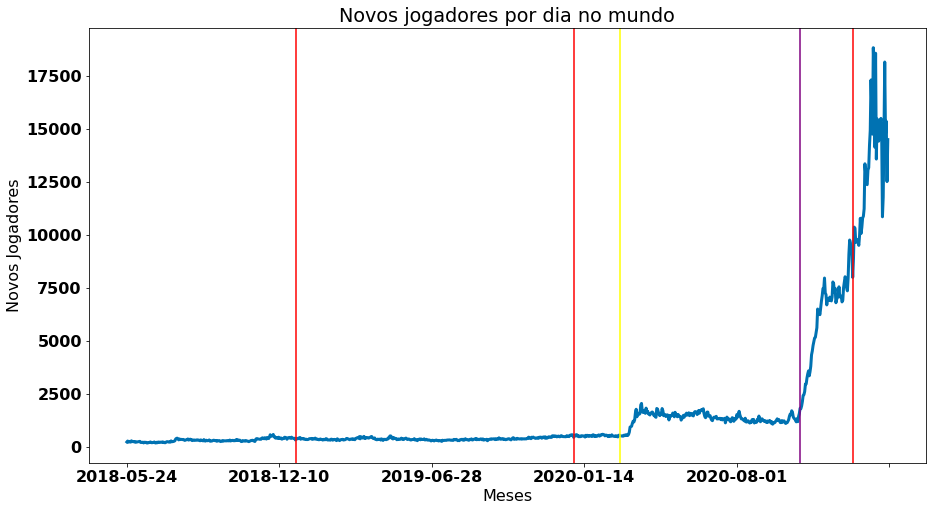

In [ ]:
D = ['2019-01-01','2020-01-01','2021-01-01']

inicio=int(len(datas)*0.80)
ndatas = datas[inicio:-2]

ndatas.plot(y="player_id", figsize=(15,8), legend=False,linewidth=3);
for d in D:
  plt.axvline(ndatas.index.get_loc(d), color = 'red')
plt.axvline(ndatas.index.get_loc('2020-03-01'), color = 'yellow')
# queens gambit October 23, 2020
plt.axvline(ndatas.index.get_loc('2020-10-23'), color = 'purple')

plt.title('Novos jogadores por dia no mundo')
plt.xlabel('Meses')
plt.ylabel("Novos Jogadores")
plt.show()

Análise FIDE

In [ ]:
!wget https://media.githubusercontent.com/media/mrcolorblind/chess_covid/master/data/fide/players.csv -O fide_players.csv

--2021-02-26 18:17:48--  https://media.githubusercontent.com/media/mrcolorblind/chess_covid/master/data/fide/players.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17691429 (17M) [text/plain]
Saving to: ‘fide_players.csv’

fide_players.csv    100%[===================>]  16.87M  40.6MB/s    in 0.4s    

2021-02-26 18:17:50 (40.6 MB/s) - ‘fide_players.csv’ saved [17691429/17691429]



In [ ]:
fide_players = pd.read_csv('fide_players.csv')
fide_players.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fide_id,name,federation,gender,title,yob
0,100013,"Campora, Daniel H.",ARG,M,GM,1957
1,100021,"Quinteros, Miguel A.",ARG,M,GM,1947
2,100048,"Iapichello, Javier",ARG,M,NaN,1990
3,100064,"Schipper, Bernardo",ARG,M,NaN,2000
4,100072,"Adla, Diego",ARG,M,IM,1968


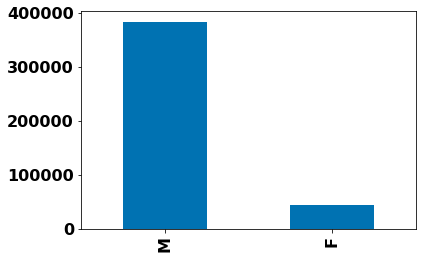

In [ ]:
fide_gender = fide_players["gender"]
gender_count = Counter(fide_gender)
df = pd.DataFrame.from_dict(gender_count, orient='index')
df.plot(kind='bar', legend=False)

In [ ]:
# proporção de mulheres na FIDE
gender_count['F']/(gender_count['F']+gender_count['M'])

0.10231521292107526

Meu script

In [ ]:
!wget https://media.githubusercontent.com/media/mrcolorblind/chess_covid/master/data/chessdotcom/matches_random.csv

--2021-02-28 11:40:06--  https://media.githubusercontent.com/media/mrcolorblind/chess_covid/master/data/chessdotcom/matches_random.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108137764 (103M) [text/plain]
Saving to: ‘matches_random.csv.1’

matches_random.csv. 100%[===================>] 103.13M   207MB/s    in 0.5s    

2021-02-28 11:40:10 (207 MB/s) - ‘matches_random.csv.1’ saved [108137764/108137764]



In [ ]:
!wget https://raw.githubusercontent.com/mrcolorblind/chess_covid/master/data/used_for_data_mining/random_players.txt

--2021-02-28 14:48:50--  https://raw.githubusercontent.com/mrcolorblind/chess_covid/master/data/used_for_data_mining/random_players.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145000 (142K) [text/plain]
Saving to: ‘random_players.txt.1’

random_players.txt. 100%[===================>] 141.60K  --.-KB/s    in 0.02s   

2021-02-28 14:48:51 (8.76 MB/s) - ‘random_players.txt.1’ saved [145000/145000]



In [ ]:
!pip install chess.com

In [ ]:
#!/bin/python3
from chessdotcom import get_player_games_by_month
import json
import csv

players_file = open('random_players.txt','r')
# cada elemento de players é um username
players = players_file.readlines()
players = [x.strip('\n') for x in players]

# essa lista serve pra evitar ter que repegar os dados
ja_contabilizados = []

try:
    file_tmp = open('matches_random.csv', 'r')
    reader = csv.reader(file_tmp)

    for row in reader:
        ja_contabilizados.append(row[0])

    file_tmp.close()
except:
    pass

# criação do arquivo csv
with open('matches_random.csv', 'a') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # criação do header do arquivo csv
    filewriter.writerow(['url', 'white_username', 'black_username', 'end_time', 'time_control', 'time_class', 'rules', 'rated'])

    # lista de anos e meses que eu vou pegar
    years = ['2019', '2020']
    months = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for i in range(len(players)):
        print('\tPegando partidas do jogador',players[i],'!!!')
        for ano in years:
            for mes in months:
                try:
                    ma_atual = get_player_games_by_month(players[i],ano,mes)
                except:
                    continue

                if len(ma_atual.json['games']) == 0:
                    # o player não jogou partidas nesse mes/ano
                    continue

                print(f'\t\tpegando de {mes}/{ano}!!!')

                # partidas é uma lista
                partidas = ma_atual.json['games']

                for j in range(len(partidas)):
                    curr_match = partidas[j]

                    if curr_match['url'] in ja_contabilizados:
                        print('Essa partida',curr_match['url'],'já foi contabilizada, indo para a próxima!')
                        continue

                    match_to_add = []

                    try:
                        match_to_add.append(curr_match['url'])
                        match_to_add.append(curr_match['white']['username'])
                        match_to_add.append(curr_match['black']['username'])
                        match_to_add.append(curr_match['end_time'])
                        match_to_add.append(curr_match['time_control'])
                        match_to_add.append(curr_match['time_class'])
                        match_to_add.append(curr_match['rules'])
                        match_to_add.append(curr_match['rated'])
                    except:
                        print('ERRO NA FORMAÇÂO DE MATCH_TO_ADD')

                    filewriter.writerow(match_to_add)
                    ja_contabilizados.append(curr_match['url'])

    print("FINALIZADO\n================================")
    print("Não consegui pegar os dados de ", nao_conseguiram, "  partidas!!! :(", sep='')


	Pegando partidas do jogador guapo_uhr !!!
		pegando de 01/2019!!!
Essa partida https://www.chess.com/live/game/3340067146 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340485877 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340516425 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340544018 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340556347 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340566528 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340583198 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340586388 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/game/3340608955 já foi contabilizada, indo para a próxima!
Essa partida https://www.chess.com/live/ga

KeyboardInterrupt: ignored